In [135]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']



In [136]:
temp, m_energy, m_energy_err, m_capacity, m_capacity_err, m_chi,m_chi_err = np.loadtxt("../data/ex06_metro_h0.dat", unpack=True, usecols=(0,2,3,4,5,6,7), skiprows=1)
g_energy, g_energy_err, g_capacity, g_capacity_err, g_chi,g_chi_err = np.loadtxt("../data/ex06_gibbs_h0.dat", unpack=True, usecols=(2,3,4,5,6,7), skiprows=1)
m_magnet, m_magnet_err = np.loadtxt("../data/ex06_metro_h002.dat", unpack=True, usecols=(2,3), skiprows=1)
g_magnet, g_magnet_err = np.loadtxt("../data/ex06_gibbs_h002.dat", unpack=True, usecols=(2,3), skiprows=1)
T = np.linspace(0.2,3.0,100)


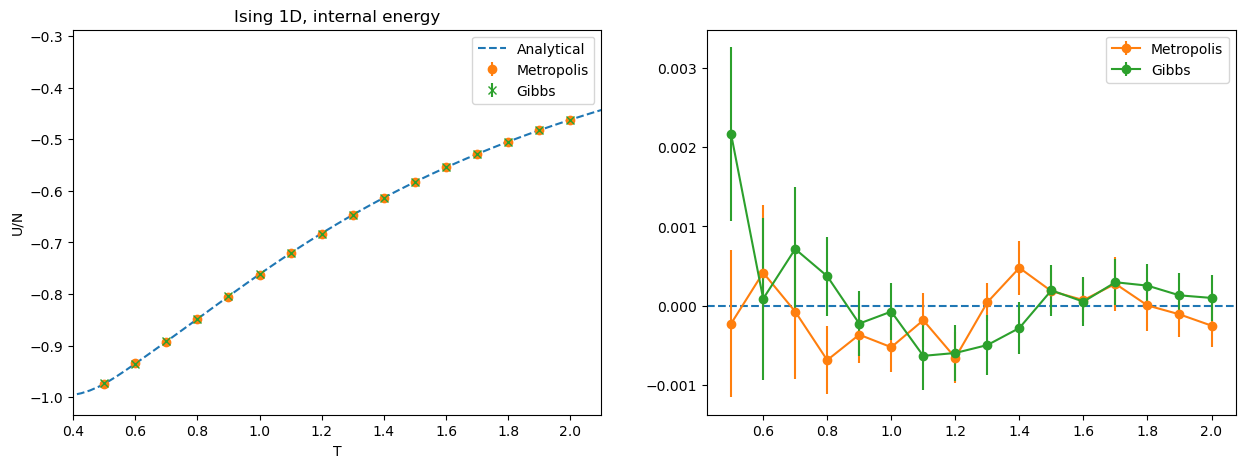

In [137]:
def energy(temp):
    beta = 1/temp
    J = 1.0
    Ns = 50
    th = np.tanh(J/temp)
    thN= th**Ns
    ch = 1/th
    return -J*( th + ch*thN )/( 1 + thN )

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(T, energy(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_energy, yerr=m_energy_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_energy, yerr=g_energy_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, internal energy')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()

plt.subplot(1, 2, 2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_energy-energy(temp), yerr=m_energy_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_energy-energy(temp), yerr=g_energy_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.show()

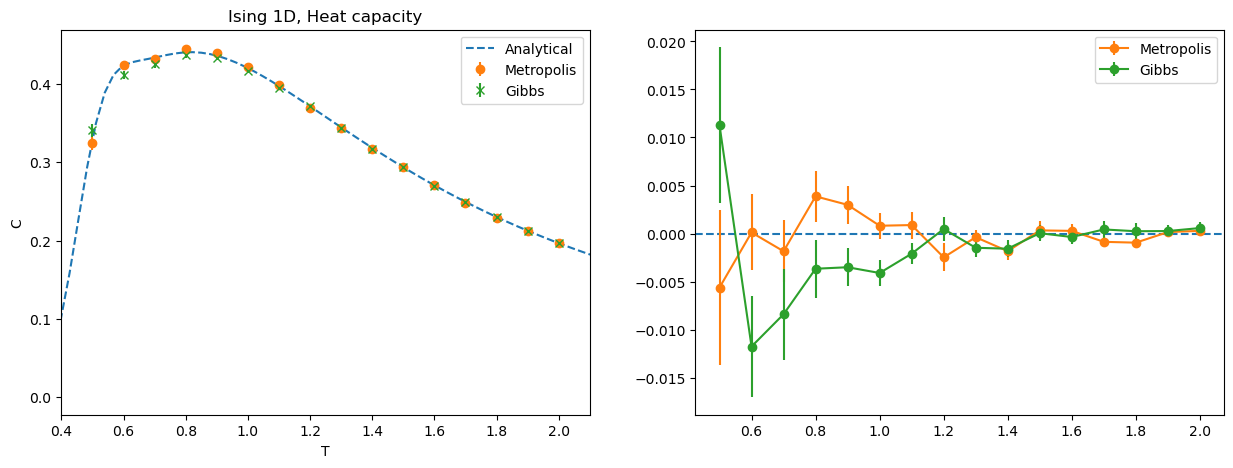

In [138]:
def capacity(temp):
    beta = 1/temp
    J = 1.0
    Ns = 50
    th = np.tanh(J/temp)
    thN= th**Ns
    ch = 1/th
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(T, capacity(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_capacity, yerr=m_capacity_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_capacity, yerr=g_capacity_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, Heat capacity')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel('C')
plt.legend()

plt.subplot(1,2,2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_capacity-capacity(temp), yerr=m_capacity_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_capacity-capacity(temp), yerr=g_capacity_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.show()


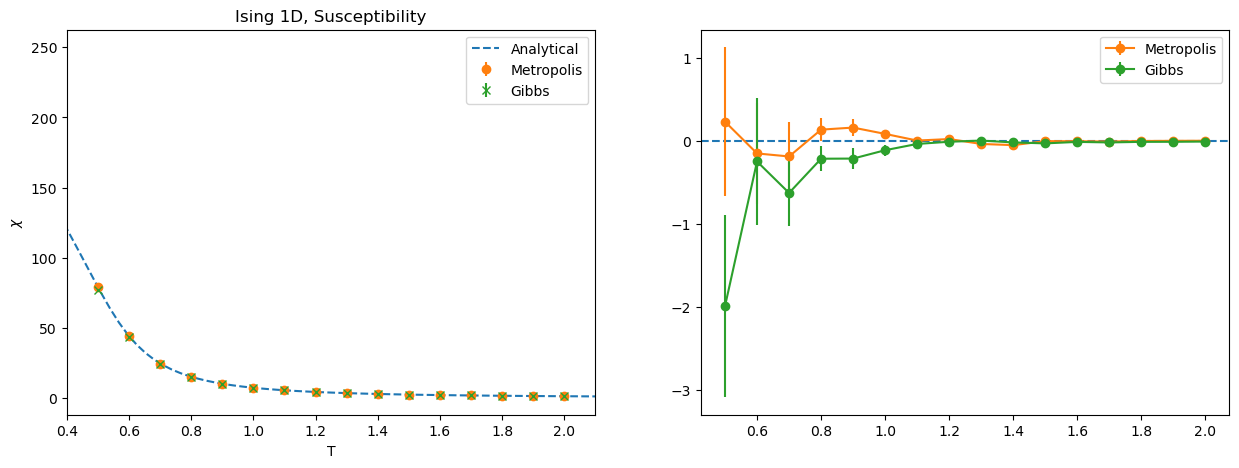

In [139]:
def susceptibility(temp):
    beta = 1/temp
    J = 1.0
    Ns = 50
    th = np.tanh(J/temp)
    thN= th**Ns
    ch = 1/th
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(T, susceptibility(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_chi, yerr=m_chi_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_chi, yerr=g_chi_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, Susceptibility')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel(r'$\chi$')
plt.legend()

plt.subplot(1,2,2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_chi-susceptibility(temp), yerr=m_chi_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_chi-susceptibility(temp), yerr=g_chi_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.show()



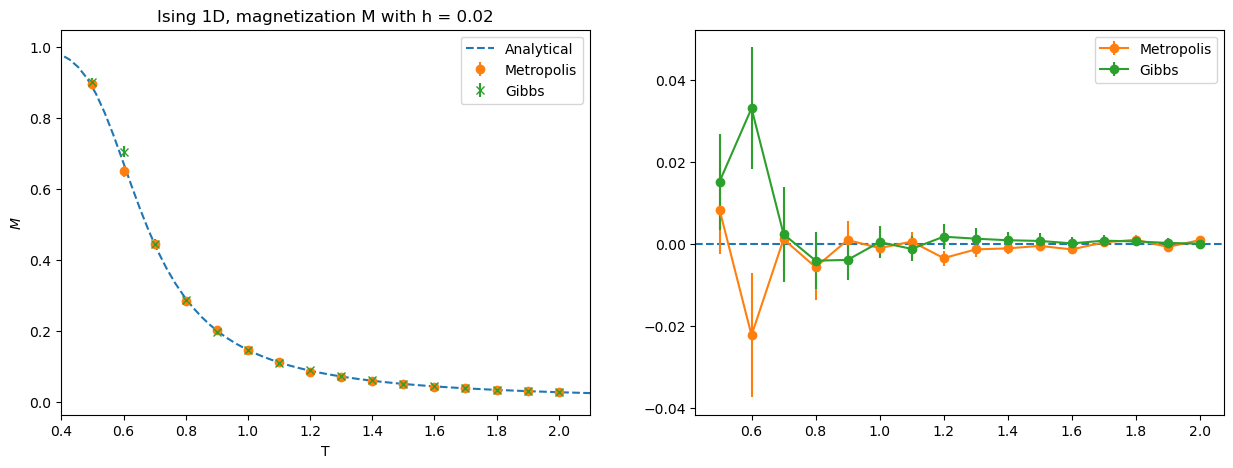

In [140]:
def magnetization(temp):
    h=0.02 #external field
    b = 1/temp
    J=1.0
    Ns=50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(T, magnetization(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_magnet, yerr=m_magnet_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_magnet, yerr=g_magnet_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel('$M$')
plt.legend()

plt.subplot(1,2,2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_magnet-magnetization(temp), yerr=m_magnet_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_magnet-magnetization(temp), yerr=g_magnet_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.show()
